In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfs = []
parent_file_location = os.path.dirname(os.path.abspath(os.getcwd()))
latnecy_data_path = os.path.join(parent_file_location,'results','throughput')
for root, dir,files in os.walk(latnecy_data_path):
    for file in files:
        if file == 'raw_data.csv':
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dfs.append(df)
raw_df = pd.concat(dfs, ignore_index=True)
raw_df.head()


,return_code,payload,latency,vaidator_count,throughput
0,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.195520,5,10
1,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.428333,5,10
2,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.353961,5,10
3,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.696426,5,10
4,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.212150,5,10


In [3]:
sucess_results = raw_df[raw_df['return_code'] == 200]
sucess_results.head()


,return_code,payload,latency,vaidator_count,throughput
0,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.195520,5,10
1,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.428333,5,10
2,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.353961,5,10
3,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.696426,5,10
4,200,{'client_req_id': 'd0da2861-0217-44a7-899a-65b...,2.212150,5,10


In [4]:
grouped_resultes = sucess_results.groupby('throughput')
result = grouped_resultes['latency'].agg(
    sample_count=('count'),
    mean_value=('mean'),
    percentile_75=lambda x: x.quantile(0.75),
    percentile_95=lambda x: x.quantile(0.95)
).reset_index()

result.head()

,throughput,sample_count,mean_value,percentile_75,percentile_95
0,10,10,2.508212,2.655336,2.961400
1,30,10,2.391985,2.513893,2.887661
2,60,10,6.936743,7.993982,8.312644
3,120,20,7.898924,9.303742,10.439823


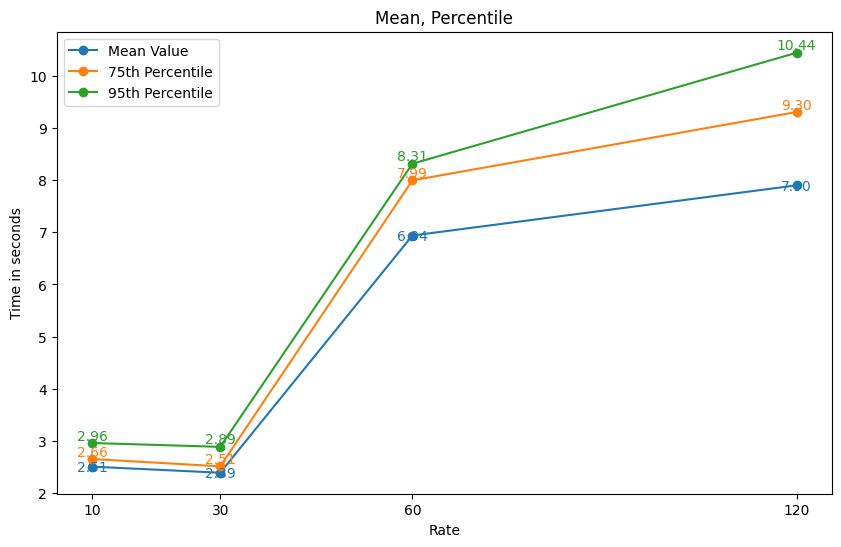

In [6]:
plt.figure(figsize=(10, 6))
mean_line, = plt.plot(result['throughput'], result['mean_value'], label='Mean Value', marker='o')
p75_line, = plt.plot(result['throughput'], result['percentile_75'], label='75th Percentile', marker='o')
p95_line, = plt.plot(result['throughput'], result['percentile_95'], label='95th Percentile', marker='o')

plt.title('Mean, Percentile')
plt.xlabel('Rate')
plt.ylabel('Time in seconds')
plt.legend()
plt.xticks(result['throughput'])

for i in range(len(result)):
    # Annotating mean values
    plt.text(result['throughput'][i], result['mean_value'][i] -0.15, f'{result["mean_value"][i]:.2f}', ha='center', va='bottom',  color=mean_line.get_color())    
    # Annotating 25th, 50th (median), and 75th percentiles
    plt.text(result['throughput'][i], result['percentile_75'][i], f'{result["percentile_75"][i]:.2f}', ha='center', va='bottom',  color=p75_line.get_color())
    plt.text(result['throughput'][i], result['percentile_95'][i], f'{result["percentile_95"][i]:.2f}', ha='center', va='bottom',  color=p95_line.get_color())



plt.show()

In [7]:
error_results = raw_df[raw_df['return_code'] != 200]
error_results.reset_index()
error_results.head()

grouped_results_error = error_results.groupby('throughput')
grouped_results_error.head()

error_result = grouped_results_error['latency'].agg(
    error_count=('count'),
).reset_index()

merged_df = pd.merge(result,error_result, on='throughput', how='outer')
merged_df.fillna(0, inplace=True)
merged_df['error_percentage'] = merged_df['error_count']/(merged_df['error_count'] + merged_df['sample_count'])*100
merged_df.head()

,throughput,sample_count,mean_value,percentile_75,percentile_95,error_count,error_percentage
0,10,10,2.508212,2.655336,2.961400,0.0,0.0
1,30,10,2.391985,2.513893,2.887661,0.0,0.0
2,60,10,6.936743,7.993982,8.312644,0.0,0.0
3,120,20,7.898924,9.303742,10.439823,0.0,0.0


In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(merged_df['throughput'], merged_df['error_percentage'],  width=1)

plt.title('Error Percentage')

plt.xlabel('Validator Count')
plt.ylabel('Percentage %')
plt.xticks(result['throughput'])


plt.show()